<h1>WeatherPy</h1>

<big><b>Analysis</big></b><br>
<big><b>Observable Trend 1:  The temperature is hottest near the equator.<br></big></b>
<big><b>Observable Trend 2:  The temperature decreases farther away from the equator at a much faster rate in the northern hemisphere due to the tilt of the earth at this time of year.<br></big></b>
<big><b>Observable Trend 3:  The southern hemisphere is much more humid.</big></b>

In [1]:
# Import Dependencies
import json
import requests
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt

from citipy import citipy
from config import api_key

<h1>Generate Cities List and Perform API Calls </h1>

In [2]:
# Cities list, which will include country code
cities_list = []

# List of cities that citipy returns, but that don't have entries in OWM
worthless_cities = []

# Lists which will be used to build the dataframe
city = []
country = []
latitude = []
longitude = []
date = []
temp = []
humidity = []
cloudiness = []
windspeed = []

# OpenWeatherMap API
url = "http://api.openweathermap.org/data/2.5/weather?"

# Initialize count (need 500 cities with no duplicates that all play nice with OpenWeatherMap)
count = 0

# I'm curious to see how many get dropped where.
total_loops = 0
non_dupe_drop_loop = 0

# Big ole while loop that does everything.  Generate random coords, find cities, get data, skip anything that doesn't work.
while count < 5000:
    total_loops += 1
    
    # Final address for each loop's city
    address = []
    
    # Generation of random coords
    lat_loop = random.randint(-90, 90)
    long_loop = random.randint(-180, 180)
    
    # Find nearest city
    city_loop = citipy.nearest_city(lat_loop, long_loop)
    
    # Retrieving city name and country code from lat/long pair
    city_name = city_loop.city_name
    country_code = city_loop.country_code
    
    # Finalize address per loop
    address.append(city_name)
    address.append(country_code)
    
    # Check to make sure there are no dupe addresses
    if address not in cities_list and address not in worthless_cities:
        
        # Query url using current loop's city and specifying units as imperial
        query_url = f'{url}appid={api_key}&q={address[0]},{address[1]}&units=imperial'
        
        # Call, store response as JSON obj
        response = requests.get(query_url)
        json = response.json()
        
        # Many of the cities in citipy don't have any entries in openweathermap. I don't want empty values
        try:
            # Date retrieval, unix, UTC
            date_loop = json['dt']
            
            # For use in the charts later, convert into something readable
            date_loop = datetime.datetime.fromtimestamp(
            int(date_loop)
            ).strftime('%Y-%m-%d %H:%M:%S')

            # Temp retrieval, F
            temp_loop = json['main']['temp_max']

            # Humidity retrieval, %
            humidity_loop = json['main']['humidity']

            # Cloudiness retrieval, %
            cloud_loop = json['clouds']['all']

            # WindSpeed retrieval, mph
            wind_loop = json['wind']['speed']
            
            # Replace random coords with city's coords
            lat_loop = json['coord']['lat']
            long_loop = json['coord']['lon']

            # If the API call was successful in all attempts, add each value to its respective list
            city.append(city_name)
            country.append(country_code)
            latitude.append(lat_loop)
            longitude.append(long_loop)
            date.append(date_loop)
            temp.append(temp_loop)
            humidity.append(humidity_loop)
            cloudiness.append(cloud_loop)
            windspeed.append(wind_loop)
            cities_list.append(address)
                            
            # Hide my API key
            url_front = query_url[:53]
            url_back = query_url[85:]
            censor = ('*' * 32)
            printable_url = url_front + censor + url_back
            
            count += 1

            # Print
            print(f'Currently calling city number {count}:')
            print(f'{city_name}, {country_code}')
            print(printable_url)
            print('')

        except:
            non_dupe_drop_loop += 1
            worthless_cities.append(address)
            continue
    
    else:
        continue

Currently calling city number 1:
teya, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=teya,ru&units=imperial

Currently calling city number 2:
vaini, to
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=vaini,to&units=imperial

Currently calling city number 3:
albany, au
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=albany,au&units=imperial

Currently calling city number 4:
barrow, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=barrow,us&units=imperial

Currently calling city number 5:
faanui, pf
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=faanui,pf&units=imperial

Currently calling city number 6:
arraial do cabo, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=arraial do cabo,br&units=imperial

Currently calling city number 7:
punta a

Currently calling city number 53:
salalah, om
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=salalah,om&units=imperial

Currently calling city number 54:
hithadhoo, mv
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=hithadhoo,mv&units=imperial

Currently calling city number 55:
kapaa, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kapaa,us&units=imperial

Currently calling city number 56:
saint-augustin, ca
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=saint-augustin,ca&units=imperial

Currently calling city number 57:
saint-philippe, re
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=saint-philippe,re&units=imperial

Currently calling city number 58:
touros, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=touros,br&units=imperial

Currentl

Currently calling city number 104:
olga, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=olga,ru&units=imperial

Currently calling city number 105:
egvekinot, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=egvekinot,ru&units=imperial

Currently calling city number 106:
chulym, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=chulym,ru&units=imperial

Currently calling city number 107:
puerto ayacucho, ve
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=puerto ayacucho,ve&units=imperial

Currently calling city number 108:
makakilo city, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=makakilo city,us&units=imperial

Currently calling city number 109:
bredasdorp, za
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=bredasdorp,za&units=imperial

Currently calling city number 154:
itarema, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=itarema,br&units=imperial

Currently calling city number 155:
somerset, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=somerset,us&units=imperial

Currently calling city number 156:
isangel, vu
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=isangel,vu&units=imperial

Currently calling city number 157:
paita, pe
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=paita,pe&units=imperial

Currently calling city number 158:
kiama, au
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kiama,au&units=imperial

Currently calling city number 159:
sitka, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=sitka,us&units=imperial

Currently calling city number 160:
luf

Currently calling city number 205:
sigli, id
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=sigli,id&units=imperial

Currently calling city number 206:
mahasamund, in
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=mahasamund,in&units=imperial

Currently calling city number 207:
trinidad, bo
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=trinidad,bo&units=imperial

Currently calling city number 208:
san patricio, mx
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=san patricio,mx&units=imperial

Currently calling city number 209:
alofi, nu
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=alofi,nu&units=imperial

Currently calling city number 210:
fresnillo, mx
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=fresnillo,mx&units=imperial

Currently call

Currently calling city number 255:
agogo, gh
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=agogo,gh&units=imperial

Currently calling city number 256:
mayo, ca
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=mayo,ca&units=imperial

Currently calling city number 257:
dunedin, nz
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=dunedin,nz&units=imperial

Currently calling city number 258:
fare, pf
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=fare,pf&units=imperial

Currently calling city number 259:
fougamou, ga
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=fougamou,ga&units=imperial

Currently calling city number 260:
taree, au
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=taree,au&units=imperial

Currently calling city number 261:
te anau, nz

Currently calling city number 306:
valley city, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=valley city,us&units=imperial

Currently calling city number 307:
gedinne, be
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=gedinne,be&units=imperial

Currently calling city number 308:
boralday, kz
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=boralday,kz&units=imperial

Currently calling city number 309:
soyo, ao
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=soyo,ao&units=imperial

Currently calling city number 310:
northam, au
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=northam,au&units=imperial

Currently calling city number 311:
chiredzi, zw
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=chiredzi,zw&units=imperial

Currently calling city

Currently calling city number 356:
dzhebariki-khaya, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=dzhebariki-khaya,ru&units=imperial

Currently calling city number 357:
kant, kg
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kant,kg&units=imperial

Currently calling city number 358:
ribeira grande, pt
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=ribeira grande,pt&units=imperial

Currently calling city number 359:
portales, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=portales,us&units=imperial

Currently calling city number 360:
oussouye, sn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=oussouye,sn&units=imperial

Currently calling city number 361:
luderitz, na
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=luderitz,na&units=imperi

Currently calling city number 406:
kultuk, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kultuk,ru&units=imperial

Currently calling city number 407:
bilibino, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=bilibino,ru&units=imperial

Currently calling city number 408:
tilichiki, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=tilichiki,ru&units=imperial

Currently calling city number 409:
orje, no
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=orje,no&units=imperial

Currently calling city number 410:
cap malheureux, mu
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=cap malheureux,mu&units=imperial

Currently calling city number 411:
mwinilunga, zm
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=mwinilunga,zm&units=imperial

Currently 

Currently calling city number 456:
san andres, co
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=san andres,co&units=imperial

Currently calling city number 457:
teguldet, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=teguldet,ru&units=imperial

Currently calling city number 458:
ejea de los caballeros, es
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=ejea de los caballeros,es&units=imperial

Currently calling city number 459:
kisesa, tz
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kisesa,tz&units=imperial

Currently calling city number 460:
fuyang, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=fuyang,cn&units=imperial

Currently calling city number 461:
nsoko, sz
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=nsoko,sz&units=imperial

Currently calling city number 506:
nastola, fi
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=nastola,fi&units=imperial

Currently calling city number 507:
moindou, nc
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=moindou,nc&units=imperial

Currently calling city number 508:
terrace, ca
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=terrace,ca&units=imperial

Currently calling city number 509:
nantucket, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=nantucket,us&units=imperial

Currently calling city number 510:
nuuk, gl
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=nuuk,gl&units=imperial

Currently calling city number 511:
fatehpur, pk
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=fatehpur,pk&units=imperial

Currently calling city numbe

Currently calling city number 557:
yeniseysk, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=yeniseysk,ru&units=imperial

Currently calling city number 558:
brae, gb
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=brae,gb&units=imperial

Currently calling city number 559:
tepalcatepec, mx
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=tepalcatepec,mx&units=imperial

Currently calling city number 560:
siderno, it
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=siderno,it&units=imperial

Currently calling city number 561:
semnan, ir
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=semnan,ir&units=imperial

Currently calling city number 562:
carbonia, it
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=carbonia,it&units=imperial

Currently calling ci

Currently calling city number 607:
angoche, mz
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=angoche,mz&units=imperial

Currently calling city number 608:
port moresby, pg
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=port moresby,pg&units=imperial

Currently calling city number 609:
aksarka, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=aksarka,ru&units=imperial

Currently calling city number 610:
manoel urbano, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=manoel urbano,br&units=imperial

Currently calling city number 611:
hervey bay, au
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=hervey bay,au&units=imperial

Currently calling city number 612:
neiafu, to
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=neiafu,to&units=imperial

Cu

Currently calling city number 657:
calabozo, ve
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=calabozo,ve&units=imperial

Currently calling city number 658:
peachland, ca
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=peachland,ca&units=imperial

Currently calling city number 659:
knin, hr
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=knin,hr&units=imperial

Currently calling city number 660:
charyshskoye, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=charyshskoye,ru&units=imperial

Currently calling city number 661:
pandan, ph
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=pandan,ph&units=imperial

Currently calling city number 662:
sistranda, no
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=sistranda,no&units=imperial

Currently callin

Currently calling city number 708:
fort nelson, ca
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=fort nelson,ca&units=imperial

Currently calling city number 709:
tsuyama, jp
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=tsuyama,jp&units=imperial

Currently calling city number 710:
richards bay, za
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=richards bay,za&units=imperial

Currently calling city number 711:
eydhafushi, mv
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=eydhafushi,mv&units=imperial

Currently calling city number 712:
nakhon thai, th
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=nakhon thai,th&units=imperial

Currently calling city number 713:
lazaro cardenas, mx
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=lazaro cardenas

Currently calling city number 758:
san policarpo, ph
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=san policarpo,ph&units=imperial

Currently calling city number 759:
whitehorse, ca
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=whitehorse,ca&units=imperial

Currently calling city number 760:
ponta delgada, pt
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=ponta delgada,pt&units=imperial

Currently calling city number 761:
quthing, ls
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=quthing,ls&units=imperial

Currently calling city number 762:
hit, iq
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=hit,iq&units=imperial

Currently calling city number 763:
luanda, ao
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=luanda,ao&units=imperial

Currentl

Currently calling city number 808:
cilibia, ro
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=cilibia,ro&units=imperial

Currently calling city number 809:
bolobo, cd
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=bolobo,cd&units=imperial

Currently calling city number 810:
black river, jm
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=black river,jm&units=imperial

Currently calling city number 811:
rancho palos verdes, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=rancho palos verdes,us&units=imperial

Currently calling city number 812:
puerto narino, co
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=puerto narino,co&units=imperial

Currently calling city number 813:
gornyy, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=gornyy,ru&unit

Currently calling city number 858:
ito, jp
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=ito,jp&units=imperial

Currently calling city number 859:
gorele, tr
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=gorele,tr&units=imperial

Currently calling city number 860:
lambarene, ga
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=lambarene,ga&units=imperial

Currently calling city number 861:
atbasar, kz
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=atbasar,kz&units=imperial

Currently calling city number 862:
isaka, tz
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=isaka,tz&units=imperial

Currently calling city number 863:
suamico, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=suamico,us&units=imperial

Currently calling city number 864:
san

Currently calling city number 909:
eyl, so
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=eyl,so&units=imperial

Currently calling city number 910:
orchard homes, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=orchard homes,us&units=imperial

Currently calling city number 911:
mnogovershinnyy, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=mnogovershinnyy,ru&units=imperial

Currently calling city number 912:
darnah, ly
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=darnah,ly&units=imperial

Currently calling city number 913:
kontagora, ng
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kontagora,ng&units=imperial

Currently calling city number 914:
la asuncion, ve
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=la asuncion,ve&units=imperial

Currently calling city number 959:
kota kinabalu, my
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kota kinabalu,my&units=imperial

Currently calling city number 960:
halmstad, se
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=halmstad,se&units=imperial

Currently calling city number 961:
kirovskaya, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kirovskaya,ru&units=imperial

Currently calling city number 962:
miandoab, ir
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=miandoab,ir&units=imperial

Currently calling city number 963:
melita, ca
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=melita,ca&units=imperial

Currently calling city number 964:
leshan, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=leshan,cn&units=imperial

Currently 

Currently calling city number 1009:
ferrol, es
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=ferrol,es&units=imperial

Currently calling city number 1010:
camocim, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=camocim,br&units=imperial

Currently calling city number 1011:
vikindu, tz
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=vikindu,tz&units=imperial

Currently calling city number 1012:
sosnovo-ozerskoye, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=sosnovo-ozerskoye,ru&units=imperial

Currently calling city number 1013:
dalby, au
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=dalby,au&units=imperial

Currently calling city number 1014:
novobiryusinskiy, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=novobiryusinskiy,ru&units=

Currently calling city number 1059:
salina cruz, mx
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=salina cruz,mx&units=imperial

Currently calling city number 1060:
oranjestad, aw
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=oranjestad,aw&units=imperial

Currently calling city number 1061:
nevel, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=nevel,ru&units=imperial

Currently calling city number 1062:
fagernes, no
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=fagernes,no&units=imperial

Currently calling city number 1063:
baturaja, id
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=baturaja,id&units=imperial

Currently calling city number 1064:
urambo, tz
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=urambo,tz&units=imperial

Currently 

Currently calling city number 1109:
kargopol, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kargopol,ru&units=imperial

Currently calling city number 1110:
port-cartier, ca
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=port-cartier,ca&units=imperial

Currently calling city number 1111:
ayagoz, kz
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=ayagoz,kz&units=imperial

Currently calling city number 1112:
rongai, ke
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=rongai,ke&units=imperial

Currently calling city number 1113:
diapaga, bf
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=diapaga,bf&units=imperial

Currently calling city number 1114:
pochutla, mx
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=pochutla,mx&units=imperial

Currently ca

Currently calling city number 1159:
carauari, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=carauari,br&units=imperial

Currently calling city number 1160:
curaca, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=curaca,br&units=imperial

Currently calling city number 1161:
zhicheng, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=zhicheng,cn&units=imperial

Currently calling city number 1162:
palauig, ph
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=palauig,ph&units=imperial

Currently calling city number 1163:
kidal, ml
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kidal,ml&units=imperial

Currently calling city number 1164:
boundiali, ci
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=boundiali,ci&units=imperial

Currently calling ci

Currently calling city number 1210:
marrakesh, ma
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=marrakesh,ma&units=imperial

Currently calling city number 1211:
olean, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=olean,us&units=imperial

Currently calling city number 1212:
foumban, cm
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=foumban,cm&units=imperial

Currently calling city number 1213:
goundi, td
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=goundi,td&units=imperial

Currently calling city number 1214:
luang prabang, la
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=luang prabang,la&units=imperial

Currently calling city number 1215:
cran-gevrier, fr
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=cran-gevrier,fr&units=imperial

Cu

Currently calling city number 1260:
tadine, nc
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=tadine,nc&units=imperial

Currently calling city number 1261:
tezu, in
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=tezu,in&units=imperial

Currently calling city number 1262:
umm lajj, sa
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=umm lajj,sa&units=imperial

Currently calling city number 1263:
paciran, id
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=paciran,id&units=imperial

Currently calling city number 1264:
jaciara, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=jaciara,br&units=imperial

Currently calling city number 1265:
teknaf, bd
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=teknaf,bd&units=imperial

Currently calling city number 

Currently calling city number 1310:
atambua, id
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=atambua,id&units=imperial

Currently calling city number 1311:
veraval, in
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=veraval,in&units=imperial

Currently calling city number 1312:
limoux, fr
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=limoux,fr&units=imperial

Currently calling city number 1313:
jorpeland, no
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=jorpeland,no&units=imperial

Currently calling city number 1314:
ust-koksa, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=ust-koksa,ru&units=imperial

Currently calling city number 1315:
kuryk, kz
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kuryk,kz&units=imperial

Currently calling ci

Currently calling city number 1361:
pemba, mz
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=pemba,mz&units=imperial

Currently calling city number 1362:
goundam, ml
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=goundam,ml&units=imperial

Currently calling city number 1363:
teguise, es
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=teguise,es&units=imperial

Currently calling city number 1364:
kuusamo, fi
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kuusamo,fi&units=imperial

Currently calling city number 1365:
hay river, ca
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=hay river,ca&units=imperial

Currently calling city number 1366:
birao, cf
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=birao,cf&units=imperial

Currently calling city num

Currently calling city number 1411:
itapirapua, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=itapirapua,br&units=imperial

Currently calling city number 1412:
muravlenko, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=muravlenko,ru&units=imperial

Currently calling city number 1413:
victor harbor, au
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=victor harbor,au&units=imperial

Currently calling city number 1414:
svetlaya, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=svetlaya,ru&units=imperial

Currently calling city number 1415:
bougouni, ml
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=bougouni,ml&units=imperial

Currently calling city number 1416:
toyooka, jp
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=toyooka,jp&units=impe

Currently calling city number 1462:
lae, pg
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=lae,pg&units=imperial

Currently calling city number 1463:
la baneza, es
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=la baneza,es&units=imperial

Currently calling city number 1464:
san ramon de la nueva oran, ar
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=san ramon de la nueva oran,ar&units=imperial

Currently calling city number 1465:
ndioum, sn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=ndioum,sn&units=imperial

Currently calling city number 1466:
yaring, th
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=yaring,th&units=imperial

Currently calling city number 1467:
peterborough, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=peterborough,u

Currently calling city number 1512:
hudson bay, ca
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=hudson bay,ca&units=imperial

Currently calling city number 1513:
shakawe, bw
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=shakawe,bw&units=imperial

Currently calling city number 1514:
kenora, ca
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kenora,ca&units=imperial

Currently calling city number 1515:
fastiv, ua
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=fastiv,ua&units=imperial

Currently calling city number 1516:
kuantan, my
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kuantan,my&units=imperial

Currently calling city number 1517:
gara, hu
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=gara,hu&units=imperial

Currently calling city num

Currently calling city number 1562:
cremona, it
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=cremona,it&units=imperial

Currently calling city number 1563:
belle fourche, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=belle fourche,us&units=imperial

Currently calling city number 1564:
wladyslawowo, pl
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=wladyslawowo,pl&units=imperial

Currently calling city number 1565:
kikwit, cd
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kikwit,cd&units=imperial

Currently calling city number 1566:
godinesti, ro
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=godinesti,ro&units=imperial

Currently calling city number 1567:
karasburg, na
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=karasburg,na&units=impe

Currently calling city number 1612:
boone, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=boone,us&units=imperial

Currently calling city number 1613:
hagersville, ca
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=hagersville,ca&units=imperial

Currently calling city number 1614:
melivoia, gr
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=melivoia,gr&units=imperial

Currently calling city number 1615:
waitati, nz
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=waitati,nz&units=imperial

Currently calling city number 1616:
hennenman, za
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=hennenman,za&units=imperial

Currently calling city number 1617:
kannauj, in
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kannauj,in&units=imperial

Currently ca

Currently calling city number 1663:
varkkallai, in
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=varkkallai,in&units=imperial

Currently calling city number 1664:
san jose, ph
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=san jose,ph&units=imperial

Currently calling city number 1665:
barinas, ve
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=barinas,ve&units=imperial

Currently calling city number 1666:
netrakona, bd
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=netrakona,bd&units=imperial

Currently calling city number 1667:
general roca, ar
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=general roca,ar&units=imperial

Currently calling city number 1668:
scarborough, gb
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=scarborough,gb&units=im

Currently calling city number 1714:
marin, mx
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=marin,mx&units=imperial

Currently calling city number 1715:
churapcha, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=churapcha,ru&units=imperial

Currently calling city number 1716:
genhe, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=genhe,cn&units=imperial

Currently calling city number 1717:
akropong, gh
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=akropong,gh&units=imperial

Currently calling city number 1718:
solvychegodsk, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=solvychegodsk,ru&units=imperial

Currently calling city number 1719:
jonesboro, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=jonesboro,us&units=imperial

Currentl

Currently calling city number 1765:
kurush, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kurush,ru&units=imperial

Currently calling city number 1766:
corum, tr
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=corum,tr&units=imperial

Currently calling city number 1767:
kawalu, id
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kawalu,id&units=imperial

Currently calling city number 1768:
mincivan, az
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=mincivan,az&units=imperial

Currently calling city number 1769:
heihe, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=heihe,cn&units=imperial

Currently calling city number 1770:
poletayevo, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=poletayevo,ru&units=imperial

Currently calling city num

Currently calling city number 1815:
fomboni, km
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=fomboni,km&units=imperial

Currently calling city number 1816:
krutinka, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=krutinka,ru&units=imperial

Currently calling city number 1817:
sita road, pk
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=sita road,pk&units=imperial

Currently calling city number 1818:
turbat, pk
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=turbat,pk&units=imperial

Currently calling city number 1819:
kichmengskiy gorodok, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kichmengskiy gorodok,ru&units=imperial

Currently calling city number 1820:
hertford, gb
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=hertford,gb&units=

Currently calling city number 1865:
buchanan, lr
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=buchanan,lr&units=imperial

Currently calling city number 1866:
comodoro rivadavia, ar
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=comodoro rivadavia,ar&units=imperial

Currently calling city number 1867:
rafsanjan, ir
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=rafsanjan,ir&units=imperial

Currently calling city number 1868:
nabire, id
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=nabire,id&units=imperial

Currently calling city number 1869:
sultanpur, in
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=sultanpur,in&units=imperial

Currently calling city number 1870:
amurzet, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=amurzet,ru&units=im

Currently calling city number 1915:
weihai, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=weihai,cn&units=imperial

Currently calling city number 1916:
anahuac, mx
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=anahuac,mx&units=imperial

Currently calling city number 1917:
guanhaes, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=guanhaes,br&units=imperial

Currently calling city number 1918:
puerto rico, co
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=puerto rico,co&units=imperial

Currently calling city number 1919:
pinsk, by
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=pinsk,by&units=imperial

Currently calling city number 1920:
nong chik, th
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=nong chik,th&units=imperial

Currently call

Currently calling city number 1965:
djougou, bj
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=djougou,bj&units=imperial

Currently calling city number 1966:
koster, za
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=koster,za&units=imperial

Currently calling city number 1967:
polonnaruwa, lk
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=polonnaruwa,lk&units=imperial

Currently calling city number 1968:
pompeu, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=pompeu,br&units=imperial

Currently calling city number 1969:
bowen, au
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=bowen,au&units=imperial

Currently calling city number 1970:
piacabucu, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=piacabucu,br&units=imperial

Currently calling 

Currently calling city number 2015:
mlowo, tz
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=mlowo,tz&units=imperial

Currently calling city number 2016:
jiutai, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=jiutai,cn&units=imperial

Currently calling city number 2017:
falam, mm
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=falam,mm&units=imperial

Currently calling city number 2018:
magomeni, tz
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=magomeni,tz&units=imperial

Currently calling city number 2019:
meybod, ir
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=meybod,ir&units=imperial

Currently calling city number 2020:
kalmunai, lk
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kalmunai,lk&units=imperial

Currently calling city number 

Currently calling city number 2065:
dalen, no
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=dalen,no&units=imperial

Currently calling city number 2066:
casper, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=casper,us&units=imperial

Currently calling city number 2067:
tacarigua, ve
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=tacarigua,ve&units=imperial

Currently calling city number 2068:
road town, vg
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=road town,vg&units=imperial

Currently calling city number 2069:
esso, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=esso,ru&units=imperial

Currently calling city number 2070:
asuncion, py
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=asuncion,py&units=imperial

Currently calling city n

Currently calling city number 2115:
samagaltay, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=samagaltay,ru&units=imperial

Currently calling city number 2116:
chumphon, th
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=chumphon,th&units=imperial

Currently calling city number 2117:
neustadt, de
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=neustadt,de&units=imperial

Currently calling city number 2118:
kuching, my
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kuching,my&units=imperial

Currently calling city number 2119:
changtu, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=changtu,cn&units=imperial

Currently calling city number 2120:
holoby, ua
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=holoby,ua&units=imperial

Currently call

Currently calling city number 2165:
kencong, id
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kencong,id&units=imperial

Currently calling city number 2166:
caranavi, bo
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=caranavi,bo&units=imperial

Currently calling city number 2167:
porto belo, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=porto belo,br&units=imperial

Currently calling city number 2168:
tucurui, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=tucurui,br&units=imperial

Currently calling city number 2169:
norden, de
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=norden,de&units=imperial

Currently calling city number 2170:
prainha, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=prainha,br&units=imperial

Currently callin

Currently calling city number 2215:
biltine, td
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=biltine,td&units=imperial

Currently calling city number 2216:
damara, cf
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=damara,cf&units=imperial

Currently calling city number 2217:
laredo, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=laredo,us&units=imperial

Currently calling city number 2218:
shimonoseki, jp
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=shimonoseki,jp&units=imperial

Currently calling city number 2219:
krasnoyarsk, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=krasnoyarsk,ru&units=imperial

Currently calling city number 2220:
camara de lobos, pt
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=camara de lobos,pt&units=impe

Currently calling city number 2266:
jacmel, ht
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=jacmel,ht&units=imperial

Currently calling city number 2267:
wanxian, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=wanxian,cn&units=imperial

Currently calling city number 2268:
galesong, id
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=galesong,id&units=imperial

Currently calling city number 2269:
lumut, my
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=lumut,my&units=imperial

Currently calling city number 2270:
nadvoitsy, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=nadvoitsy,ru&units=imperial

Currently calling city number 2271:
nueva loja, ec
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=nueva loja,ec&units=imperial

Currently callin

Currently calling city number 2316:
guozhen, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=guozhen,cn&units=imperial

Currently calling city number 2317:
tokur, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=tokur,ru&units=imperial

Currently calling city number 2318:
beipiao, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=beipiao,cn&units=imperial

Currently calling city number 2319:
hazorasp, uz
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=hazorasp,uz&units=imperial

Currently calling city number 2320:
kirensk, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kirensk,ru&units=imperial

Currently calling city number 2321:
kpandu, gh
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kpandu,gh&units=imperial

Currently calling city num

Currently calling city number 2366:
conway, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=conway,us&units=imperial

Currently calling city number 2367:
bemidji, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=bemidji,us&units=imperial

Currently calling city number 2368:
cefalu, it
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=cefalu,it&units=imperial

Currently calling city number 2369:
sembe, cg
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=sembe,cg&units=imperial

Currently calling city number 2370:
algiers, dz
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=algiers,dz&units=imperial

Currently calling city number 2371:
kamalpur, in
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kamalpur,in&units=imperial

Currently calling city numbe

Currently calling city number 2417:
mangai, cd
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=mangai,cd&units=imperial

Currently calling city number 2418:
lakes entrance, au
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=lakes entrance,au&units=imperial

Currently calling city number 2419:
sao miguel do araguaia, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=sao miguel do araguaia,br&units=imperial

Currently calling city number 2420:
nova olinda do norte, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=nova olinda do norte,br&units=imperial

Currently calling city number 2421:
manzhouli, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=manzhouli,cn&units=imperial

Currently calling city number 2422:
shizunai, jp
http://api.openweathermap.org/data/2.5/weather?appid=***********

Currently calling city number 2468:
hede, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=hede,cn&units=imperial

Currently calling city number 2469:
mbaiki, cf
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=mbaiki,cf&units=imperial

Currently calling city number 2470:
suhbaatar, mn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=suhbaatar,mn&units=imperial

Currently calling city number 2471:
brindisi, it
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=brindisi,it&units=imperial

Currently calling city number 2472:
blackwater, au
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=blackwater,au&units=imperial

Currently calling city number 2473:
yorosso, ml
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=yorosso,ml&units=imperial

Currently calling 

Currently calling city number 2518:
kishi, ng
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kishi,ng&units=imperial

Currently calling city number 2519:
mazagao, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=mazagao,br&units=imperial

Currently calling city number 2520:
consett, gb
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=consett,gb&units=imperial

Currently calling city number 2521:
sazonovo, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=sazonovo,ru&units=imperial

Currently calling city number 2522:
dukat, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=dukat,ru&units=imperial

Currently calling city number 2523:
felipe carrillo puerto, mx
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=felipe carrillo puerto,mx&units=imperial

Currently calling city number 2568:
halmeu, ro
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=halmeu,ro&units=imperial

Currently calling city number 2569:
aksay, kz
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=aksay,kz&units=imperial

Currently calling city number 2570:
san pedro, bz
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=san pedro,bz&units=imperial

Currently calling city number 2571:
garh maharaja, pk
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=garh maharaja,pk&units=imperial

Currently calling city number 2572:
chancay, pe
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=chancay,pe&units=imperial

Currently calling city number 2573:
san pedro, bo
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=san pedro,bo&units=imperial

Currentl

Currently calling city number 2618:
shumskiy, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=shumskiy,ru&units=imperial

Currently calling city number 2619:
visnes, no
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=visnes,no&units=imperial

Currently calling city number 2620:
san felipe, mx
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=san felipe,mx&units=imperial

Currently calling city number 2621:
cacoal, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=cacoal,br&units=imperial

Currently calling city number 2622:
sargatskoye, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=sargatskoye,ru&units=imperial

Currently calling city number 2623:
karlskrona, se
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=karlskrona,se&units=imperial

Curr

Currently calling city number 2669:
chiguayante, cl
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=chiguayante,cl&units=imperial

Currently calling city number 2670:
pop, uz
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=pop,uz&units=imperial

Currently calling city number 2671:
jaromerice nad rokytnou, cz
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=jaromerice nad rokytnou,cz&units=imperial

Currently calling city number 2672:
linfen, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=linfen,cn&units=imperial

Currently calling city number 2673:
adrian, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=adrian,us&units=imperial

Currently calling city number 2674:
dom pedrito, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=dom pedrito,br&un

Currently calling city number 2719:
ovalle, cl
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=ovalle,cl&units=imperial

Currently calling city number 2720:
la serena, cl
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=la serena,cl&units=imperial

Currently calling city number 2721:
shimanovsk, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=shimanovsk,ru&units=imperial

Currently calling city number 2722:
curuca, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=curuca,br&units=imperial

Currently calling city number 2723:
palora, ec
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=palora,ec&units=imperial

Currently calling city number 2724:
ask, no
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=ask,no&units=imperial

Currently calling city num

Currently calling city number 2769:
kungurtug, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kungurtug,ru&units=imperial

Currently calling city number 2770:
novyy svit, ua
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=novyy svit,ua&units=imperial

Currently calling city number 2771:
enshi, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=enshi,cn&units=imperial

Currently calling city number 2772:
at-bashi, kg
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=at-bashi,kg&units=imperial

Currently calling city number 2773:
olavarria, ar
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=olavarria,ar&units=imperial

Currently calling city number 2774:
yuzhno-kurilsk, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=yuzhno-kurilsk,ru&units=imperi

Currently calling city number 2819:
kazerun, ir
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kazerun,ir&units=imperial

Currently calling city number 2820:
zhaozhou, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=zhaozhou,cn&units=imperial

Currently calling city number 2821:
krutikha, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=krutikha,ru&units=imperial

Currently calling city number 2822:
de aar, za
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=de aar,za&units=imperial

Currently calling city number 2823:
general bravo, mx
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=general bravo,mx&units=imperial

Currently calling city number 2824:
langham, ca
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=langham,ca&units=imperial

Currentl

Currently calling city number 2870:
aloleng, ph
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=aloleng,ph&units=imperial

Currently calling city number 2871:
gizycko, pl
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=gizycko,pl&units=imperial

Currently calling city number 2872:
karur, in
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=karur,in&units=imperial

Currently calling city number 2873:
dzheguta, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=dzheguta,ru&units=imperial

Currently calling city number 2874:
pankrushikha, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=pankrushikha,ru&units=imperial

Currently calling city number 2875:
bacolod, ph
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=bacolod,ph&units=imperial

Currently call

Currently calling city number 2920:
beaverlodge, ca
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=beaverlodge,ca&units=imperial

Currently calling city number 2921:
tambacounda, sn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=tambacounda,sn&units=imperial

Currently calling city number 2922:
kaniama, cd
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kaniama,cd&units=imperial

Currently calling city number 2923:
can, tr
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=can,tr&units=imperial

Currently calling city number 2924:
carthage, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=carthage,us&units=imperial

Currently calling city number 2925:
dawson creek, ca
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=dawson creek,ca&units=imperial

Cu

Currently calling city number 2970:
ylivieska, fi
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=ylivieska,fi&units=imperial

Currently calling city number 2971:
madimba, tz
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=madimba,tz&units=imperial

Currently calling city number 2972:
high rock, bs
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=high rock,bs&units=imperial

Currently calling city number 2973:
san borja, bo
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=san borja,bo&units=imperial

Currently calling city number 2974:
twentynine palms, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=twentynine palms,us&units=imperial

Currently calling city number 2975:
almeirim, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=almeirim,br&units=

Currently calling city number 3021:
waterloo, sl
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=waterloo,sl&units=imperial

Currently calling city number 3022:
altamira, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=altamira,br&units=imperial

Currently calling city number 3023:
porosozero, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=porosozero,ru&units=imperial

Currently calling city number 3024:
fereydunshahr, ir
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=fereydunshahr,ir&units=imperial

Currently calling city number 3025:
aksaray, tr
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=aksaray,tr&units=imperial

Currently calling city number 3026:
ous, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=ous,ru&units=imperial

Currentl

Currently calling city number 3071:
kitui, ke
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kitui,ke&units=imperial

Currently calling city number 3072:
king city, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=king city,us&units=imperial

Currently calling city number 3073:
ribas do rio pardo, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=ribas do rio pardo,br&units=imperial

Currently calling city number 3074:
mali, gn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=mali,gn&units=imperial

Currently calling city number 3075:
hamilton, au
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=hamilton,au&units=imperial

Currently calling city number 3076:
maningrida, au
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=maningrida,au&units=imperial

Currently calling city number 3121:
rockport, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=rockport,us&units=imperial

Currently calling city number 3122:
letpadan, mm
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=letpadan,mm&units=imperial

Currently calling city number 3123:
bucarasica, co
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=bucarasica,co&units=imperial

Currently calling city number 3124:
feijo, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=feijo,br&units=imperial

Currently calling city number 3125:
yakeshi, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=yakeshi,cn&units=imperial

Currently calling city number 3126:
callaway, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=callaway,us&units=imperial

Currently call

Currently calling city number 3171:
barnbach, at
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=barnbach,at&units=imperial

Currently calling city number 3172:
gainesville, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=gainesville,us&units=imperial

Currently calling city number 3173:
nandu, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=nandu,cn&units=imperial

Currently calling city number 3174:
pouso alegre, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=pouso alegre,br&units=imperial

Currently calling city number 3175:
maloy, no
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=maloy,no&units=imperial

Currently calling city number 3176:
tarnow, pl
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=tarnow,pl&units=imperial

Currently ca

Currently calling city number 3222:
tsabong, bw
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=tsabong,bw&units=imperial

Currently calling city number 3223:
sivas, tr
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=sivas,tr&units=imperial

Currently calling city number 3224:
hikari, jp
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=hikari,jp&units=imperial

Currently calling city number 3225:
borovskoy, kz
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=borovskoy,kz&units=imperial

Currently calling city number 3226:
numan, ng
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=numan,ng&units=imperial

Currently calling city number 3227:
osorheiu, ro
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=osorheiu,ro&units=imperial

Currently calling city num

Currently calling city number 3273:
norwich, gb
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=norwich,gb&units=imperial

Currently calling city number 3274:
mandurah, au
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=mandurah,au&units=imperial

Currently calling city number 3275:
marathon, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=marathon,us&units=imperial

Currently calling city number 3276:
yima, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=yima,cn&units=imperial

Currently calling city number 3277:
troy, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=troy,us&units=imperial

Currently calling city number 3278:
oeiras do para, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=oeiras do para,br&units=imperial

Currently callin

Currently calling city number 3323:
randazzo, it
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=randazzo,it&units=imperial

Currently calling city number 3324:
urbana, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=urbana,us&units=imperial

Currently calling city number 3325:
angoram, pg
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=angoram,pg&units=imperial

Currently calling city number 3326:
jitauna, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=jitauna,br&units=imperial

Currently calling city number 3327:
ladario, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=ladario,br&units=imperial

Currently calling city number 3328:
santiago, ph
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=santiago,ph&units=imperial

Currently calling ci

Currently calling city number 3374:
jizan, sa
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=jizan,sa&units=imperial

Currently calling city number 3375:
aiquile, bo
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=aiquile,bo&units=imperial

Currently calling city number 3376:
cave spring, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=cave spring,us&units=imperial

Currently calling city number 3377:
zahnitkiv, ua
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=zahnitkiv,ua&units=imperial

Currently calling city number 3378:
jinotega, ni
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=jinotega,ni&units=imperial

Currently calling city number 3379:
tonantins, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=tonantins,br&units=imperial

Currentl

Currently calling city number 3424:
cataingan, ph
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=cataingan,ph&units=imperial

Currently calling city number 3425:
vung tau, vn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=vung tau,vn&units=imperial

Currently calling city number 3426:
rumoi, jp
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=rumoi,jp&units=imperial

Currently calling city number 3427:
sicamous, ca
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=sicamous,ca&units=imperial

Currently calling city number 3428:
nahrin, af
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=nahrin,af&units=imperial

Currently calling city number 3429:
georgetown, gy
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=georgetown,gy&units=imperial

Currently call

Currently calling city number 3474:
chunian, pk
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=chunian,pk&units=imperial

Currently calling city number 3475:
okakarara, na
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=okakarara,na&units=imperial

Currently calling city number 3476:
le pradet, fr
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=le pradet,fr&units=imperial

Currently calling city number 3477:
alghero, it
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=alghero,it&units=imperial

Currently calling city number 3478:
devavanya, hu
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=devavanya,hu&units=imperial

Currently calling city number 3479:
nguruka, tz
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=nguruka,tz&units=imperial

Currently 

Currently calling city number 3525:
binzhou, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=binzhou,cn&units=imperial

Currently calling city number 3526:
si sa ket, th
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=si sa ket,th&units=imperial

Currently calling city number 3527:
fergus falls, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=fergus falls,us&units=imperial

Currently calling city number 3528:
mount pleasant, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=mount pleasant,us&units=imperial

Currently calling city number 3529:
baisha, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=baisha,cn&units=imperial

Currently calling city number 3530:
kananga, cd
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kananga,cd&units=imperi

Currently calling city number 3576:
san francisco, ar
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=san francisco,ar&units=imperial

Currently calling city number 3577:
leon, ni
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=leon,ni&units=imperial

Currently calling city number 3578:
calamar, co
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=calamar,co&units=imperial

Currently calling city number 3579:
danane, ci
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=danane,ci&units=imperial

Currently calling city number 3580:
lincoln, ar
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=lincoln,ar&units=imperial

Currently calling city number 3581:
nsanje, mw
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=nsanje,mw&units=imperial

Currently calling ci

Currently calling city number 3626:
synya, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=synya,ru&units=imperial

Currently calling city number 3627:
savonlinna, fi
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=savonlinna,fi&units=imperial

Currently calling city number 3628:
haimen, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=haimen,cn&units=imperial

Currently calling city number 3629:
merke, kz
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=merke,kz&units=imperial

Currently calling city number 3630:
rubiataba, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=rubiataba,br&units=imperial

Currently calling city number 3631:
pitsunda, ge
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=pitsunda,ge&units=imperial

Currently calling ci

Currently calling city number 3676:
san rafael, ph
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=san rafael,ph&units=imperial

Currently calling city number 3677:
manturovo, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=manturovo,ru&units=imperial

Currently calling city number 3678:
mgandu, tz
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=mgandu,tz&units=imperial

Currently calling city number 3679:
west allis, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=west allis,us&units=imperial

Currently calling city number 3680:
tevaitoa, pf
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=tevaitoa,pf&units=imperial

Currently calling city number 3681:
rudnaya pristan, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=rudnaya pristan,ru&units=

Currently calling city number 3726:
mumford, gh
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=mumford,gh&units=imperial

Currently calling city number 3727:
panaba, mx
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=panaba,mx&units=imperial

Currently calling city number 3728:
lapy, pl
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=lapy,pl&units=imperial

Currently calling city number 3729:
montepuez, mz
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=montepuez,mz&units=imperial

Currently calling city number 3730:
ambovombe, mg
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=ambovombe,mg&units=imperial

Currently calling city number 3731:
francisco beltrao, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=francisco beltrao,br&units=imperial

Cu

Currently calling city number 3775:
bezhanitsy, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=bezhanitsy,ru&units=imperial

Currently calling city number 3776:
socorro, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=socorro,us&units=imperial

Currently calling city number 3777:
nkayi, cg
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=nkayi,cg&units=imperial

Currently calling city number 3778:
bikin, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=bikin,ru&units=imperial

Currently calling city number 3779:
pindiga, ng
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=pindiga,ng&units=imperial

Currently calling city number 3780:
zhovkva, ua
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=zhovkva,ua&units=imperial

Currently calling city n

Currently calling city number 3825:
el cobre, cu
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=el cobre,cu&units=imperial

Currently calling city number 3826:
zasechnoye, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=zasechnoye,ru&units=imperial

Currently calling city number 3827:
siguiri, gn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=siguiri,gn&units=imperial

Currently calling city number 3828:
harlingen, nl
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=harlingen,nl&units=imperial

Currently calling city number 3829:
neokhorion, gr
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=neokhorion,gr&units=imperial

Currently calling city number 3830:
kamyshin, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kamyshin,ru&units=imperial

Cu

Currently calling city number 3875:
boueni, yt
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=boueni,yt&units=imperial

Currently calling city number 3876:
gusau, ng
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=gusau,ng&units=imperial

Currently calling city number 3877:
udomlya, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=udomlya,ru&units=imperial

Currently calling city number 3878:
spearfish, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=spearfish,us&units=imperial

Currently calling city number 3879:
leeton, au
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=leeton,au&units=imperial

Currently calling city number 3880:
lincoln, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=lincoln,us&units=imperial

Currently calling city num

Currently calling city number 3926:
sokoto, ng
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=sokoto,ng&units=imperial

Currently calling city number 3927:
braganca, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=braganca,br&units=imperial

Currently calling city number 3928:
carahue, cl
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=carahue,cl&units=imperial

Currently calling city number 3929:
halberstadt, de
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=halberstadt,de&units=imperial

Currently calling city number 3930:
kimparana, ml
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kimparana,ml&units=imperial

Currently calling city number 3931:
goya, ar
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=goya,ar&units=imperial

Currently callin

Currently calling city number 3976:
doba, td
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=doba,td&units=imperial

Currently calling city number 3977:
utinga, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=utinga,br&units=imperial

Currently calling city number 3978:
kampot, kh
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kampot,kh&units=imperial

Currently calling city number 3979:
ebolowa, cm
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=ebolowa,cm&units=imperial

Currently calling city number 3980:
nkhotakota, mw
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=nkhotakota,mw&units=imperial

Currently calling city number 3981:
san matias, bo
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=san matias,bo&units=imperial

Currently calling ci

Currently calling city number 4026:
magdagachi, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=magdagachi,ru&units=imperial

Currently calling city number 4027:
rancharia, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=rancharia,br&units=imperial

Currently calling city number 4028:
mapiripan, co
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=mapiripan,co&units=imperial

Currently calling city number 4029:
nawa, sy
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=nawa,sy&units=imperial

Currently calling city number 4030:
ruswil, ch
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=ruswil,ch&units=imperial

Currently calling city number 4031:
chaman, pk
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=chaman,pk&units=imperial

Currently calling 

Currently calling city number 4076:
druzhba, ua
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=druzhba,ua&units=imperial

Currently calling city number 4077:
ciocanesti, ro
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=ciocanesti,ro&units=imperial

Currently calling city number 4078:
taman, id
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=taman,id&units=imperial

Currently calling city number 4079:
coria, es
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=coria,es&units=imperial

Currently calling city number 4080:
alberton, ca
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=alberton,ca&units=imperial

Currently calling city number 4081:
youghal, ie
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=youghal,ie&units=imperial

Currently calling city

Currently calling city number 4126:
joao pinheiro, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=joao pinheiro,br&units=imperial

Currently calling city number 4127:
grimshaw, ca
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=grimshaw,ca&units=imperial

Currently calling city number 4128:
el tarra, co
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=el tarra,co&units=imperial

Currently calling city number 4129:
kyzyl-suu, kg
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kyzyl-suu,kg&units=imperial

Currently calling city number 4130:
griffith, au
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=griffith,au&units=imperial

Currently calling city number 4131:
korhogo, ci
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=korhogo,ci&units=imperial



Currently calling city number 4176:
leczyca, pl
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=leczyca,pl&units=imperial

Currently calling city number 4177:
zhaotong, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=zhaotong,cn&units=imperial

Currently calling city number 4178:
port lavaca, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=port lavaca,us&units=imperial

Currently calling city number 4179:
thyolo, mw
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=thyolo,mw&units=imperial

Currently calling city number 4180:
new smyrna beach, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=new smyrna beach,us&units=imperial

Currently calling city number 4181:
jinzhou, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=jinzhou,cn&units=imperi

Currently calling city number 4226:
xiaolingwei, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=xiaolingwei,cn&units=imperial

Currently calling city number 4227:
sabaudia, it
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=sabaudia,it&units=imperial

Currently calling city number 4228:
bernalillo, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=bernalillo,us&units=imperial

Currently calling city number 4229:
chaiyaphum, th
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=chaiyaphum,th&units=imperial

Currently calling city number 4230:
kopychyntsi, ua
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kopychyntsi,ua&units=imperial

Currently calling city number 4231:
vyazma, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=vyazma,ru&units=impe

Currently calling city number 4276:
phalombe, mw
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=phalombe,mw&units=imperial

Currently calling city number 4277:
kanevskaya, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kanevskaya,ru&units=imperial

Currently calling city number 4278:
agnibilekrou, ci
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=agnibilekrou,ci&units=imperial

Currently calling city number 4279:
seminole, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=seminole,us&units=imperial

Currently calling city number 4280:
rio cuarto, ar
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=rio cuarto,ar&units=imperial

Currently calling city number 4281:
spencer, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=spencer,us&units=imperi

Currently calling city number 4326:
metro, id
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=metro,id&units=imperial

Currently calling city number 4327:
yauya, pe
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=yauya,pe&units=imperial

Currently calling city number 4328:
kayes, ml
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kayes,ml&units=imperial

Currently calling city number 4329:
diamantino, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=diamantino,br&units=imperial

Currently calling city number 4330:
yayva, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=yayva,ru&units=imperial

Currently calling city number 4331:
rindal, no
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=rindal,no&units=imperial

Currently calling city number 4332

Currently calling city number 4376:
sao jose de ribamar, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=sao jose de ribamar,br&units=imperial

Currently calling city number 4377:
ingersoll, ca
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=ingersoll,ca&units=imperial

Currently calling city number 4378:
alanya, tr
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=alanya,tr&units=imperial

Currently calling city number 4379:
castlemaine, au
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=castlemaine,au&units=imperial

Currently calling city number 4380:
paoua, cf
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=paoua,cf&units=imperial

Currently calling city number 4381:
paharpur, pk
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=paharpur,pk&units=

Currently calling city number 4426:
iraucuba, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=iraucuba,br&units=imperial

Currently calling city number 4427:
rupert, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=rupert,us&units=imperial

Currently calling city number 4428:
warren, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=warren,us&units=imperial

Currently calling city number 4429:
pedasi, pa
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=pedasi,pa&units=imperial

Currently calling city number 4430:
chisec, gt
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=chisec,gt&units=imperial

Currently calling city number 4431:
muncar, id
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=muncar,id&units=imperial

Currently calling city number 

Currently calling city number 4476:
jiaozuo, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=jiaozuo,cn&units=imperial

Currently calling city number 4477:
mumbwa, zm
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=mumbwa,zm&units=imperial

Currently calling city number 4478:
decatur, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=decatur,us&units=imperial

Currently calling city number 4479:
albury, au
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=albury,au&units=imperial

Currently calling city number 4480:
alice town, bs
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=alice town,bs&units=imperial

Currently calling city number 4481:
santiago, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=santiago,br&units=imperial

Currently calling 

Currently calling city number 4527:
muroran, jp
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=muroran,jp&units=imperial

Currently calling city number 4528:
wahiawa, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=wahiawa,us&units=imperial

Currently calling city number 4529:
smolenka, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=smolenka,ru&units=imperial

Currently calling city number 4530:
la florida, hn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=la florida,hn&units=imperial

Currently calling city number 4531:
ferme-neuve, ca
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=ferme-neuve,ca&units=imperial

Currently calling city number 4532:
eyemouth, gb
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=eyemouth,gb&units=imperial

Curr

Currently calling city number 4577:
paso de los toros, uy
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=paso de los toros,uy&units=imperial

Currently calling city number 4578:
afikpo, ng
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=afikpo,ng&units=imperial

Currently calling city number 4579:
marathon, ca
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=marathon,ca&units=imperial

Currently calling city number 4580:
butte, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=butte,us&units=imperial

Currently calling city number 4581:
ramotswa, bw
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=ramotswa,bw&units=imperial

Currently calling city number 4582:
fort pierce, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=fort pierce,us&units=imperi

Currently calling city number 4628:
fairview, ca
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=fairview,ca&units=imperial

Currently calling city number 4629:
konstancin-jeziorna, pl
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=konstancin-jeziorna,pl&units=imperial

Currently calling city number 4630:
poway, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=poway,us&units=imperial

Currently calling city number 4631:
tacuarembo, uy
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=tacuarembo,uy&units=imperial

Currently calling city number 4632:
novyy nekouz, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=novyy nekouz,ru&units=imperial

Currently calling city number 4633:
alampur, in
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=alampur,in&

Currently calling city number 4678:
xicotencatl, mx
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=xicotencatl,mx&units=imperial

Currently calling city number 4679:
wloszczowa, pl
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=wloszczowa,pl&units=imperial

Currently calling city number 4680:
alexandria, eg
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=alexandria,eg&units=imperial

Currently calling city number 4681:
khandbari, np
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=khandbari,np&units=imperial

Currently calling city number 4682:
la libertad, sv
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=la libertad,sv&units=imperial

Currently calling city number 4683:
makkaveyevo, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=makkaveyevo,r

Currently calling city number 4729:
honolulu, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=honolulu,us&units=imperial

Currently calling city number 4730:
escarcega, mx
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=escarcega,mx&units=imperial

Currently calling city number 4731:
uarini, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=uarini,br&units=imperial

Currently calling city number 4732:
chandur, in
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=chandur,in&units=imperial

Currently calling city number 4733:
brynmawr, gb
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=brynmawr,gb&units=imperial

Currently calling city number 4734:
ust-barguzin, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=ust-barguzin,ru&units=imperial

Curren

Currently calling city number 4780:
lam luk ka, th
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=lam luk ka,th&units=imperial

Currently calling city number 4781:
umm bab, qa
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=umm bab,qa&units=imperial

Currently calling city number 4782:
ulverstone, au
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=ulverstone,au&units=imperial

Currently calling city number 4783:
niagara falls, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=niagara falls,us&units=imperial

Currently calling city number 4784:
eston, ca
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=eston,ca&units=imperial

Currently calling city number 4785:
onokhoy, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=onokhoy,ru&units=imperial

Cu

Currently calling city number 4830:
hoa binh, vn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=hoa binh,vn&units=imperial

Currently calling city number 4831:
uvira, cd
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=uvira,cd&units=imperial

Currently calling city number 4832:
bossier city, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=bossier city,us&units=imperial

Currently calling city number 4833:
hamada, jp
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=hamada,jp&units=imperial

Currently calling city number 4834:
punta umbria, es
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=punta umbria,es&units=imperial

Currently calling city number 4835:
bhinga, in
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=bhinga,in&units=imperial

Currentl

Currently calling city number 4880:
maues, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=maues,br&units=imperial

Currently calling city number 4881:
male, mv
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=male,mv&units=imperial

Currently calling city number 4882:
dauriya, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=dauriya,ru&units=imperial

Currently calling city number 4883:
colomi, bo
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=colomi,bo&units=imperial

Currently calling city number 4884:
tarabuco, bo
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=tarabuco,bo&units=imperial

Currently calling city number 4885:
rosetown, ca
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=rosetown,ca&units=imperial

Currently calling city number 

Currently calling city number 4930:
viljoenskroon, za
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=viljoenskroon,za&units=imperial

Currently calling city number 4931:
ouro preto do oeste, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=ouro preto do oeste,br&units=imperial

Currently calling city number 4932:
linjiang, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=linjiang,cn&units=imperial

Currently calling city number 4933:
betwagan, ph
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=betwagan,ph&units=imperial

Currently calling city number 4934:
priyutovo, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=priyutovo,ru&units=imperial

Currently calling city number 4935:
malacacheta, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=m

Currently calling city number 4980:
ambalavao, mg
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=ambalavao,mg&units=imperial

Currently calling city number 4981:
kawambwa, zm
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kawambwa,zm&units=imperial

Currently calling city number 4982:
dok kham tai, th
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=dok kham tai,th&units=imperial

Currently calling city number 4983:
boquira, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=boquira,br&units=imperial

Currently calling city number 4984:
truth or consequences, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=truth or consequences,us&units=imperial

Currently calling city number 4985:
mandali, iq
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=manda

In [23]:
# Just to see how many times the loop was abandoned due to my if statement or try/except statement
dupes_dropped = total_loops - non_dupe_drop_loop - 5000
print(f'Number of random coords generated: {total_loops}')
print(f'Number of dupe coords dropped: {dupes_dropped}')
print(f'Number of unique coords that don\'t have entries in OWM: {non_dupe_drop_loop}')


Number of random coords generated: 52845
Number of dupe coords dropped: 47257
Number of unique coords that don't have entries in OWM: 588


In [4]:
# Build data frame with collected data
df = pd.DataFrame({'City' : city,
                   'Cloudiness' : cloudiness,
                   'Country' : country,
                   'Date' : date,
                   'Humidity' : humidity,
                   'Lat' : latitude,
                   'Lng' : longitude,
                   'Max Temp' : temp,
                   'Wind Speed' : windspeed
                   })

print(len(df['City']))
df.head()

5000


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,teya,80,ru,2018-04-02 22:58:03,75,60.37,92.63,20.38,5.64
1,vaini,88,to,2018-04-02 22:57:55,100,-21.20,-175.20,79.87,27.11
2,albany,0,au,2018-04-02 22:58:04,59,-35.02,117.88,81.31,9.89
3,barrow,90,us,2018-04-02 22:35:00,93,39.51,-90.40,39.20,8.05
4,faanui,44,pf,2018-04-02 22:57:56,100,-16.48,-151.75,82.39,11.79


<h1>Latitude vs Temperature Plot</h1>

Text(0.5,1,'City Latitude vs. Max Temperature on 2018-04-02')

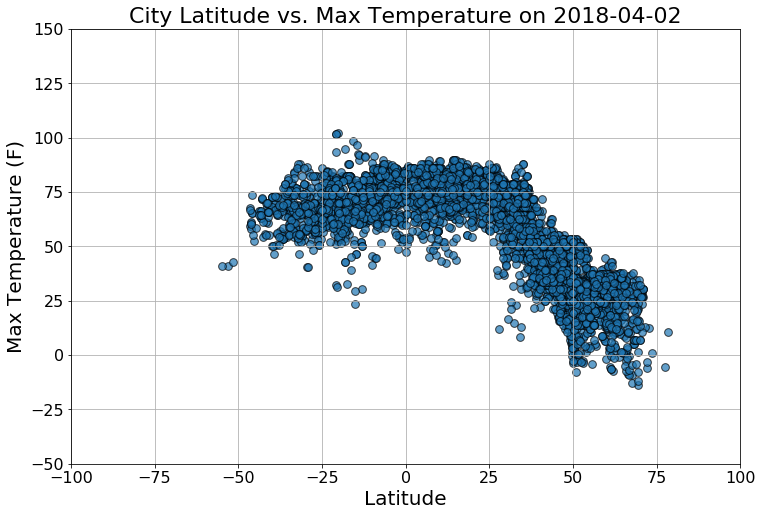

In [5]:
current_date =  df['Date'][0][:10]

df.plot.scatter('Lat', 'Max Temp', s=60, edgecolor='black', alpha=.70,
                figsize=(12, 8), fontsize=16, grid=True, 
                xlim=(-100, 100), ylim=(-50, 150))

plt.ylabel('Max Temperature (F)', fontsize=20)
plt.xlabel('Latitude', fontsize=20)
plt.title(f'City Latitude vs. Max Temperature on {current_date}', fontsize=22)


<h1>Latitude vs Humidity Plot</h1>

Text(0.5,1,'City Latitude vs. Humidity on 2018-04-02')

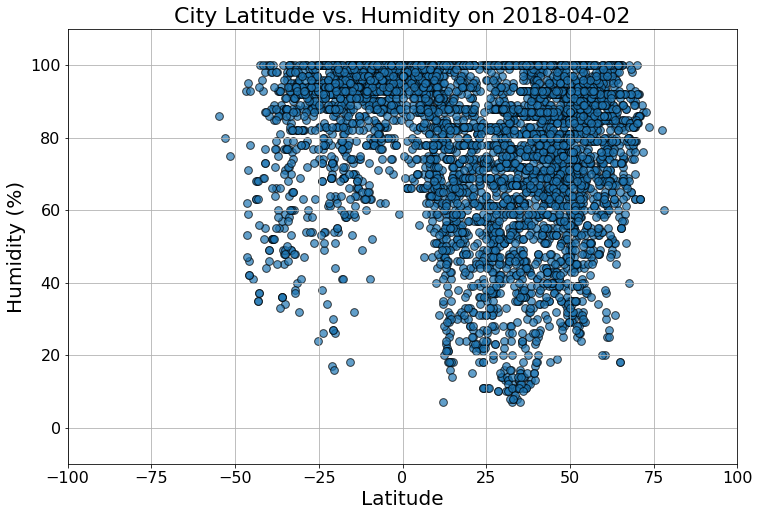

In [6]:
df.plot.scatter('Lat', 'Humidity', s=60, edgecolor='black', alpha=.70,
                figsize=(12, 8), fontsize=16, grid=True,
                xlim=(-100, 100), ylim=(-10, 110))

plt.ylabel('Humidity (%)', fontsize=20)
plt.xlabel('Latitude', fontsize=20)
plt.title(f'City Latitude vs. Humidity on {current_date}', fontsize=22)


<h1>Latitude vs Cloudiness Plot</h1>

Text(0.5,1,'City Latitude vs. Cloud Coverage on 2018-04-02')

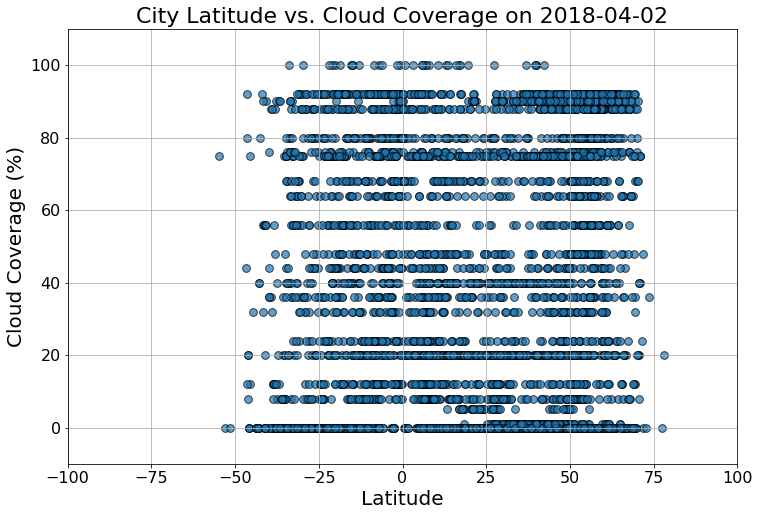

In [7]:
df.plot.scatter('Lat', 'Cloudiness', s=60, edgecolor='black', alpha=.70,
                figsize=(12, 8), fontsize=16, grid=True,
                xlim=(-100, 100), ylim=(-10, 110))

plt.ylabel('Cloud Coverage (%)', fontsize=20)
plt.xlabel('Latitude', fontsize=20)
plt.title(f'City Latitude vs. Cloud Coverage on {current_date}', fontsize=22)


<h1>Latitude vs Wind Speed Plot</h1>

Text(0.5,1,'City Latitude vs. Wind Speed on 2018-04-02')

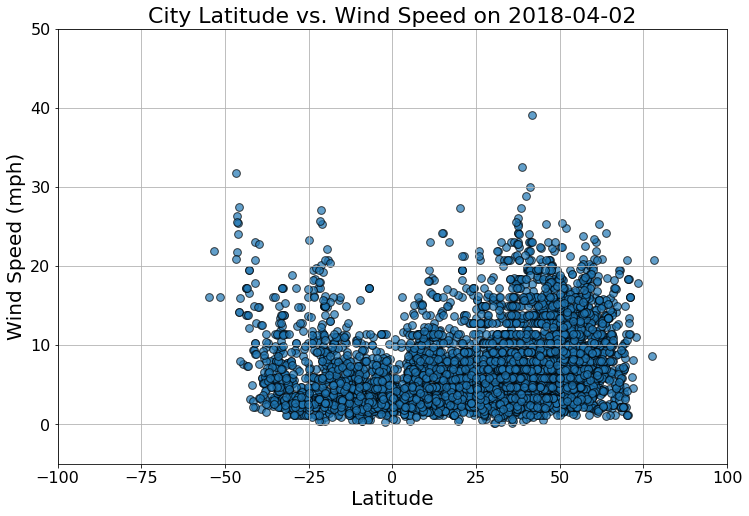

In [8]:
df.plot.scatter('Lat', 'Wind Speed', s=60, edgecolor='black', alpha=.70,
                figsize=(12, 8), fontsize=16, grid=True,
                xlim=(-100, 100), ylim=(-5, 50))

plt.ylabel('Wind Speed (mph)', fontsize=20)
plt.xlabel('Latitude', fontsize=20)
plt.title(f'City Latitude vs. Wind Speed on {current_date}', fontsize=22)



In [29]:
df.to_csv('WeatherPy_df.csv', encoding='utf-8')

<h1> End of homework, the rest is just extra stuff I did out of curiosity. </h1>

Text(0.5,1,'Temp Map')

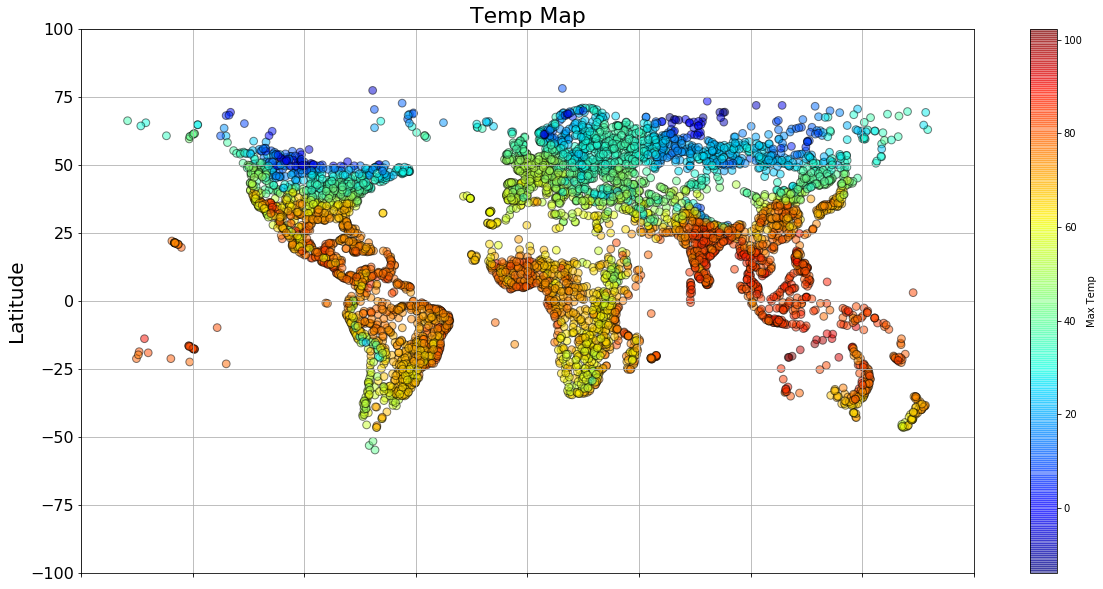

In [38]:
current_date =  df['Date'][0][:10]

df.plot.scatter('Lng', 'Lat', s=60, edgecolor='black', alpha=0.50, c='Max Temp', colormap = 'jet',
                figsize=(20, 10), fontsize=16, grid=True, 
                xlim=(-200, 200), ylim=(-100, 100))

plt.ylabel('Latitude', fontsize=20)
plt.xlabel('Longitude', fontsize=20)
plt.title('Temp Map', fontsize=22)

Text(0.5,1,'Humidity Map')

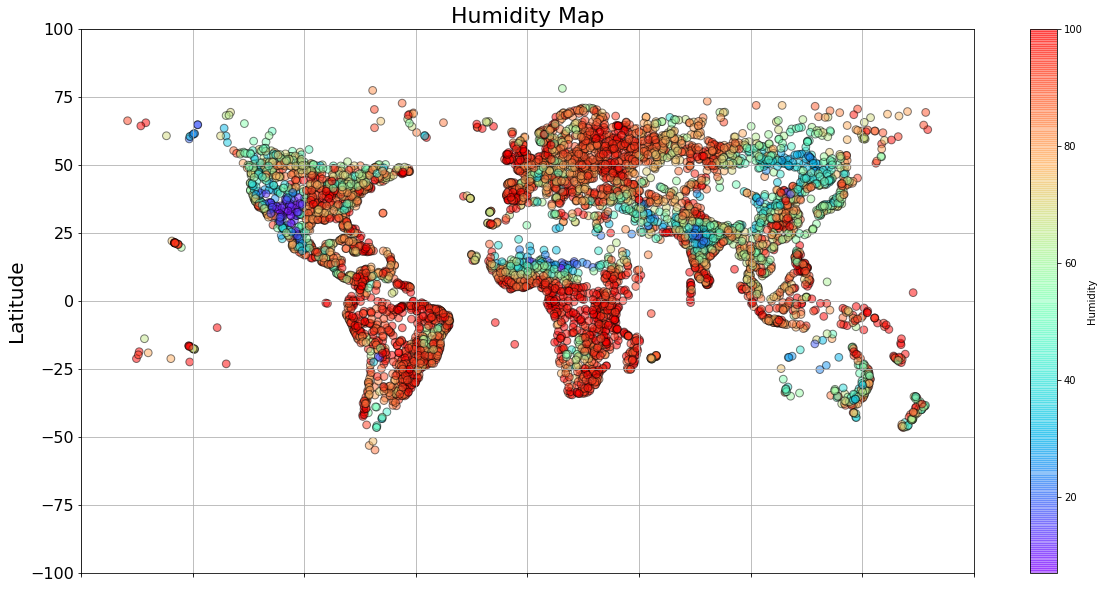

In [40]:
current_date =  df['Date'][0][:10]

df.plot.scatter('Lng', 'Lat', s=60, edgecolor='black', alpha=0.50, c='Humidity', colormap = 'rainbow',
                figsize=(20, 10), fontsize=16, grid=True, 
                xlim=(-200, 200), ylim=(-100, 100))

plt.ylabel('Latitude', fontsize=20)
plt.xlabel('Longitude', fontsize=20)
plt.title('Humidity Map', fontsize=22)

Text(0.5,1,'Cloud Map')

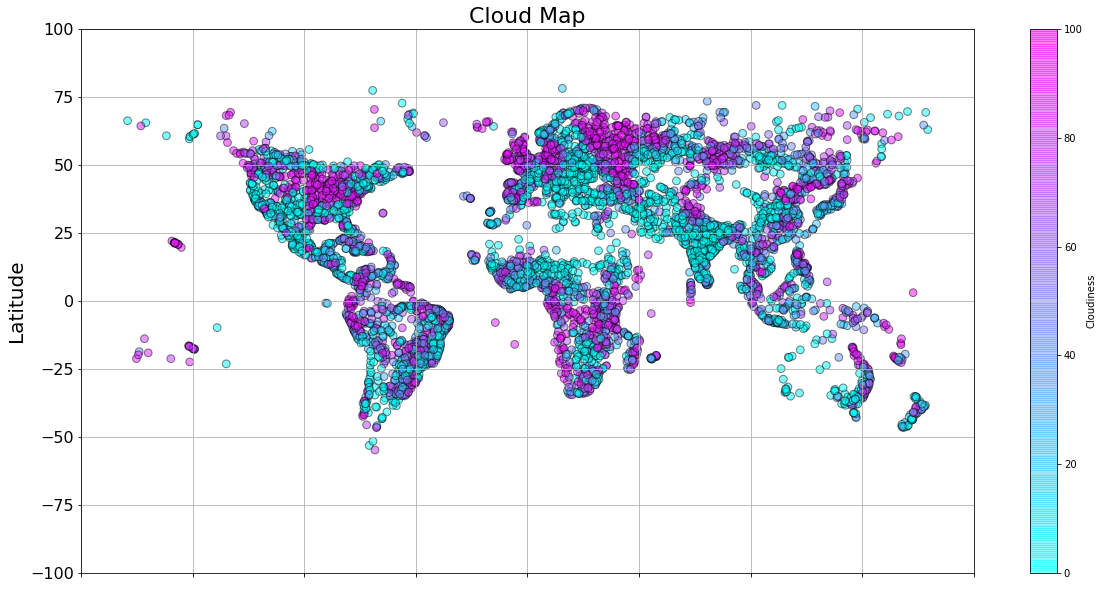

In [35]:
current_date =  df['Date'][0][:10]

df.plot.scatter('Lng', 'Lat', s=60, edgecolor='black', alpha=0.50, c='Cloudiness', colormap = 'cool',
                figsize=(20, 10), fontsize=16, grid=True, 
                xlim=(-200, 200), ylim=(-100, 100))

plt.ylabel('Latitude', fontsize=20)
plt.xlabel('Longitude', fontsize=20)
plt.title('Cloud Map', fontsize=22)